# Salary Predictions Based on Job Descriptions

### ---- Define the problem ----

I am tasked with making predictions of people's salaries based on various features about them. This is potentially useful to a company as it will allow them to properly salary their employees without overpaying or underpaying. It could also provide useful information to recruiters and recruiting companies about what salary ranges to give candidates for certain positions, or what salary ranges to offer specific candidates based on their qualifications.

There is a training set with salary labels and a test set without salary labels, which I must predict.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from EDAhelperfunctions import *
from clean_helperfunctions import *

__author__ = "Sam Bellows"
__email__ = "sbellows1@gmail.com"

### ---- Load the data ----

In [2]:
def load_data(filepath):
    '''load data from given filepath'''
    return pd.read_csv(filepath)

train_features = load_data('data/train_features.csv')
test_features = load_data('data/test_features.csv')
train_target = load_data('data/train_salaries.csv')

### ---- EDA ----

In [3]:
basic_eda(train_features)

The dataframe:
               jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16  
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000

Lots of useful information here! The dataframe is fairly clean with no missing values in any column. There are 2 numeric features and 6 categorical features. It appears that jobId is a unique identifier as it had 1000000 unique values over 1000000 records. I will examine the test df for NAs and as well as the salary df.

In [4]:
basic_eda(test_features)

The dataframe:
               jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44  
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non

In [5]:
basic_eda(train_target)

The dataframe:
               jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
Number of duplicates:
 0
Column Names:
 Index(['jobId', 'salary'], dtype='object')
Describe:
                salary
count  1000000.000000
mean       116.061818
std         38.717936
min          0.000000
25%         88.000000
50%        114.000000
75%        141.000000
max        301.000000
Describe:
                    jobId
count            1000000
unique           1000000
top     JOB1362684549163
freq                   1
Data Types:
 jobId     object
salary     int64
dtype: object


It appears that salary is expressed in thousands, ranging from 0 to 301. These outer values seem somewhat unlikely and will need to be explored.

In [6]:
def merge_dfs_delete_originals (df1, df2, key=None, left_index=False, right_index=False):
    '''merge two dataframes on the given key, keep the given indices, and then delete the original dataframes'''
    merge_df = df1.merge(df2, on=key, left_index=left_index, right_index=right_index)
    del df1
    del df2
    return merge_df

train_full = merge_dfs_delete_originals(train_features, train_target)
train_full.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


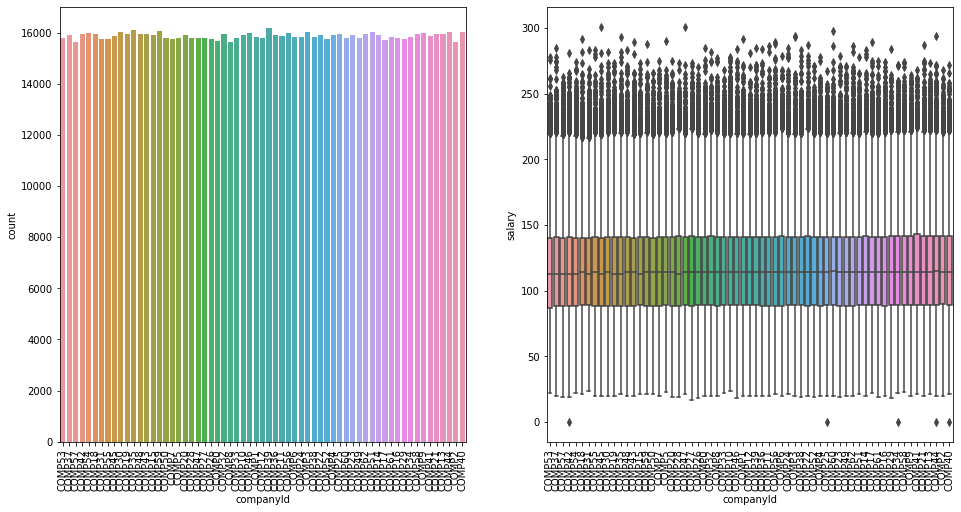

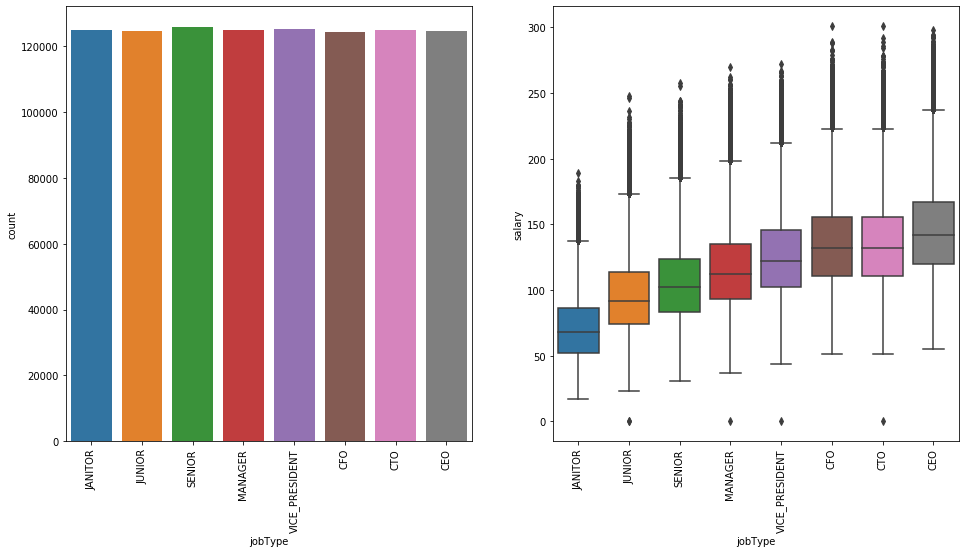

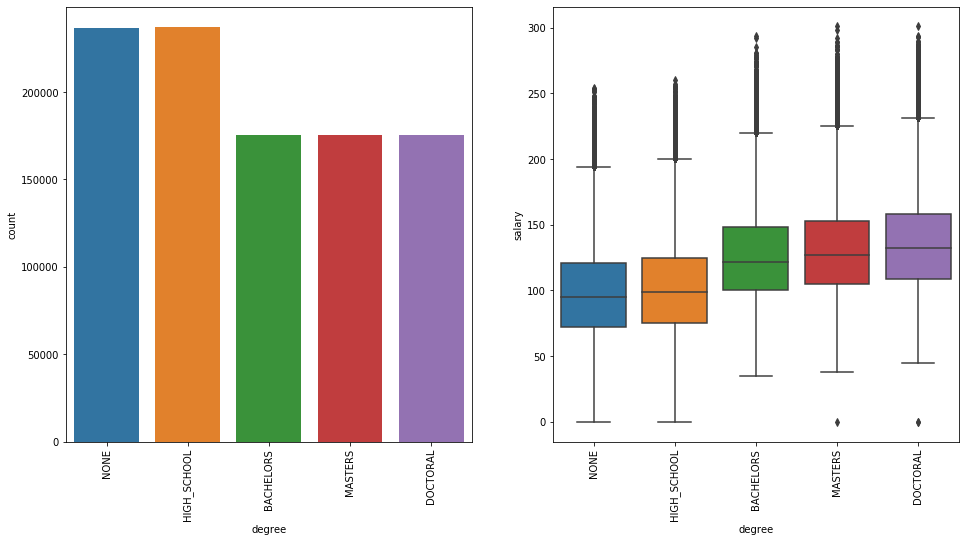

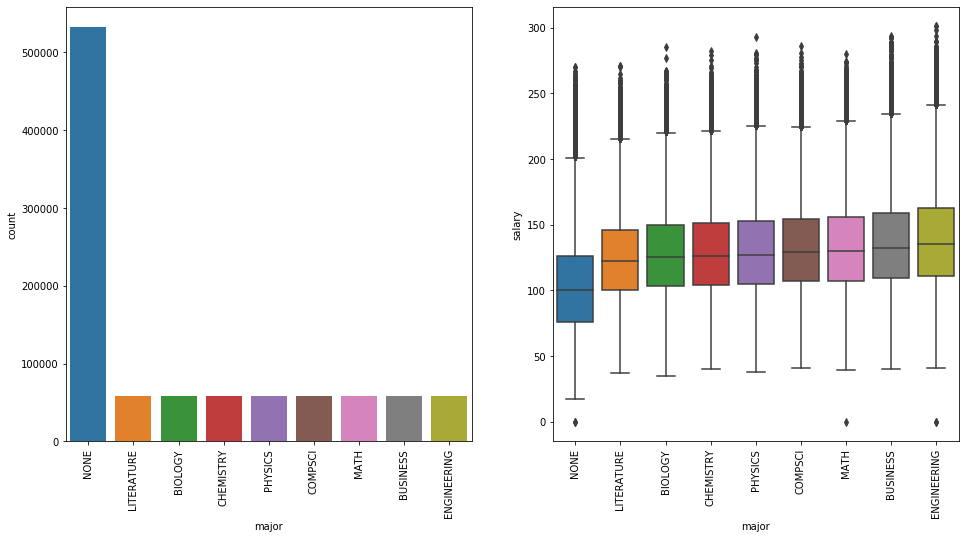

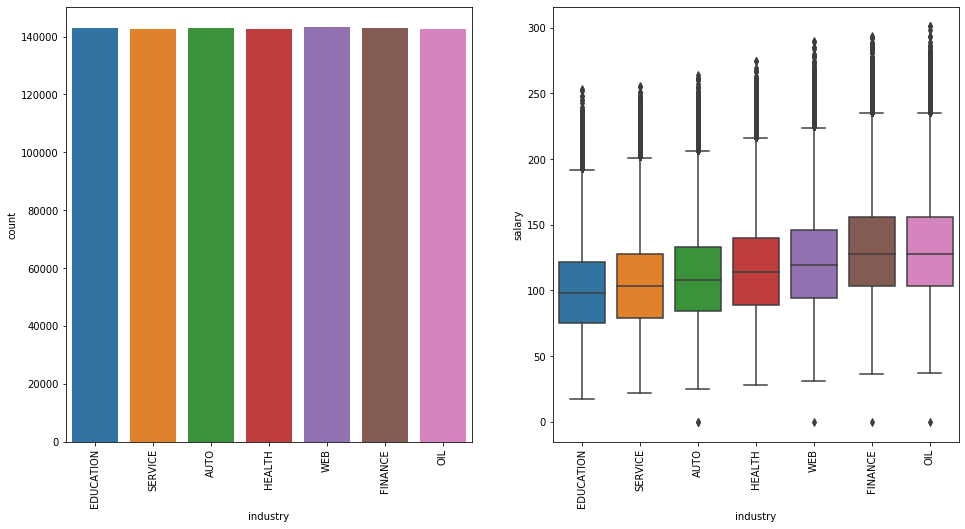

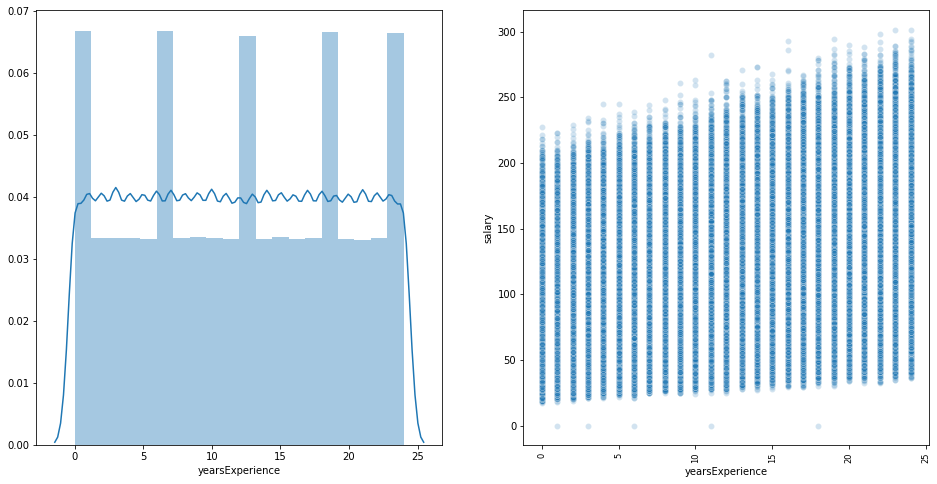

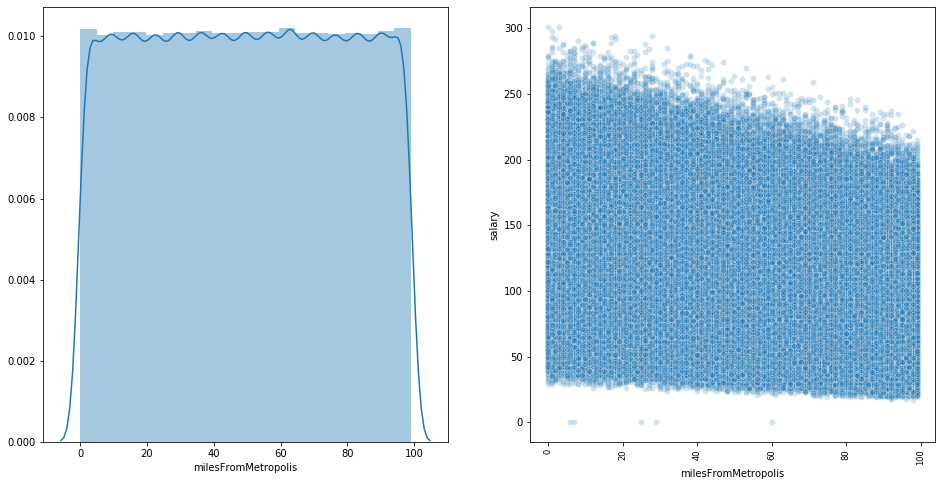

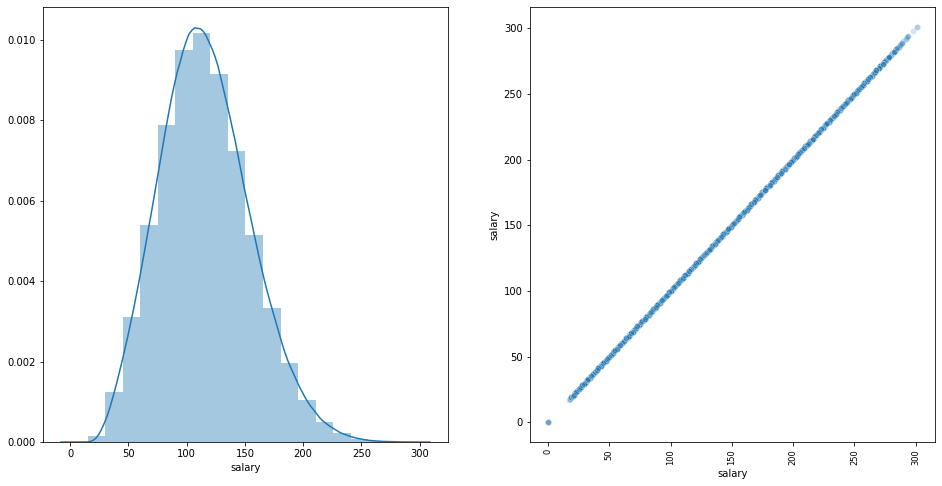

In [7]:
plot_feature(train_full, 'companyId', 'salary')
plot_feature(train_full, 'jobType', 'salary')
plot_feature(train_full, 'degree', 'salary')
plot_feature(train_full, 'major', 'salary')
plot_feature(train_full, 'industry', 'salary')
plot_feature(train_full, 'yearsExperience', 'salary')
plot_feature(train_full, 'milesFromMetropolis', 'salary')
plot_feature(train_full, 'salary', 'salary')

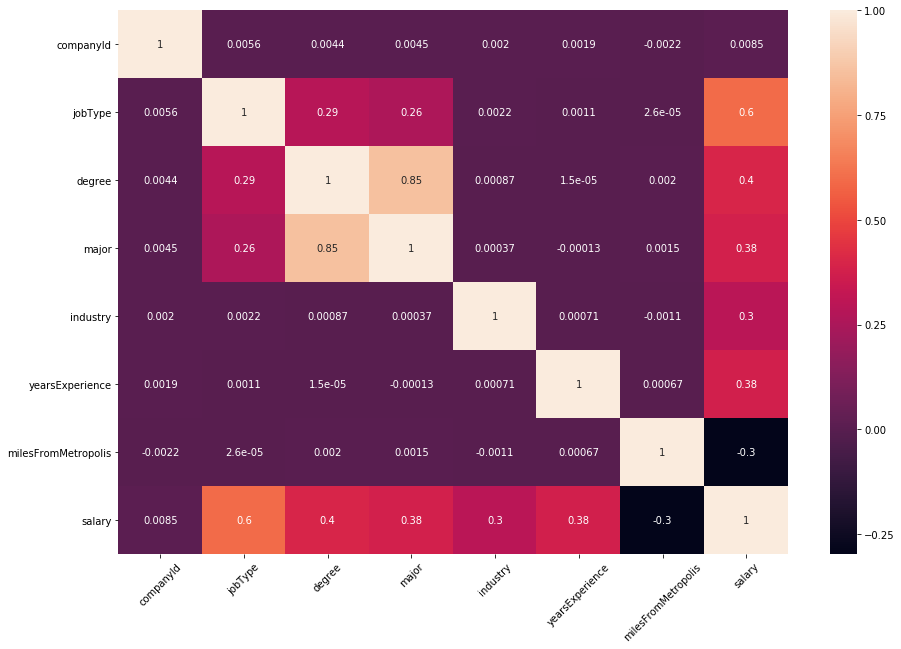

<Figure size 1080x720 with 0 Axes>

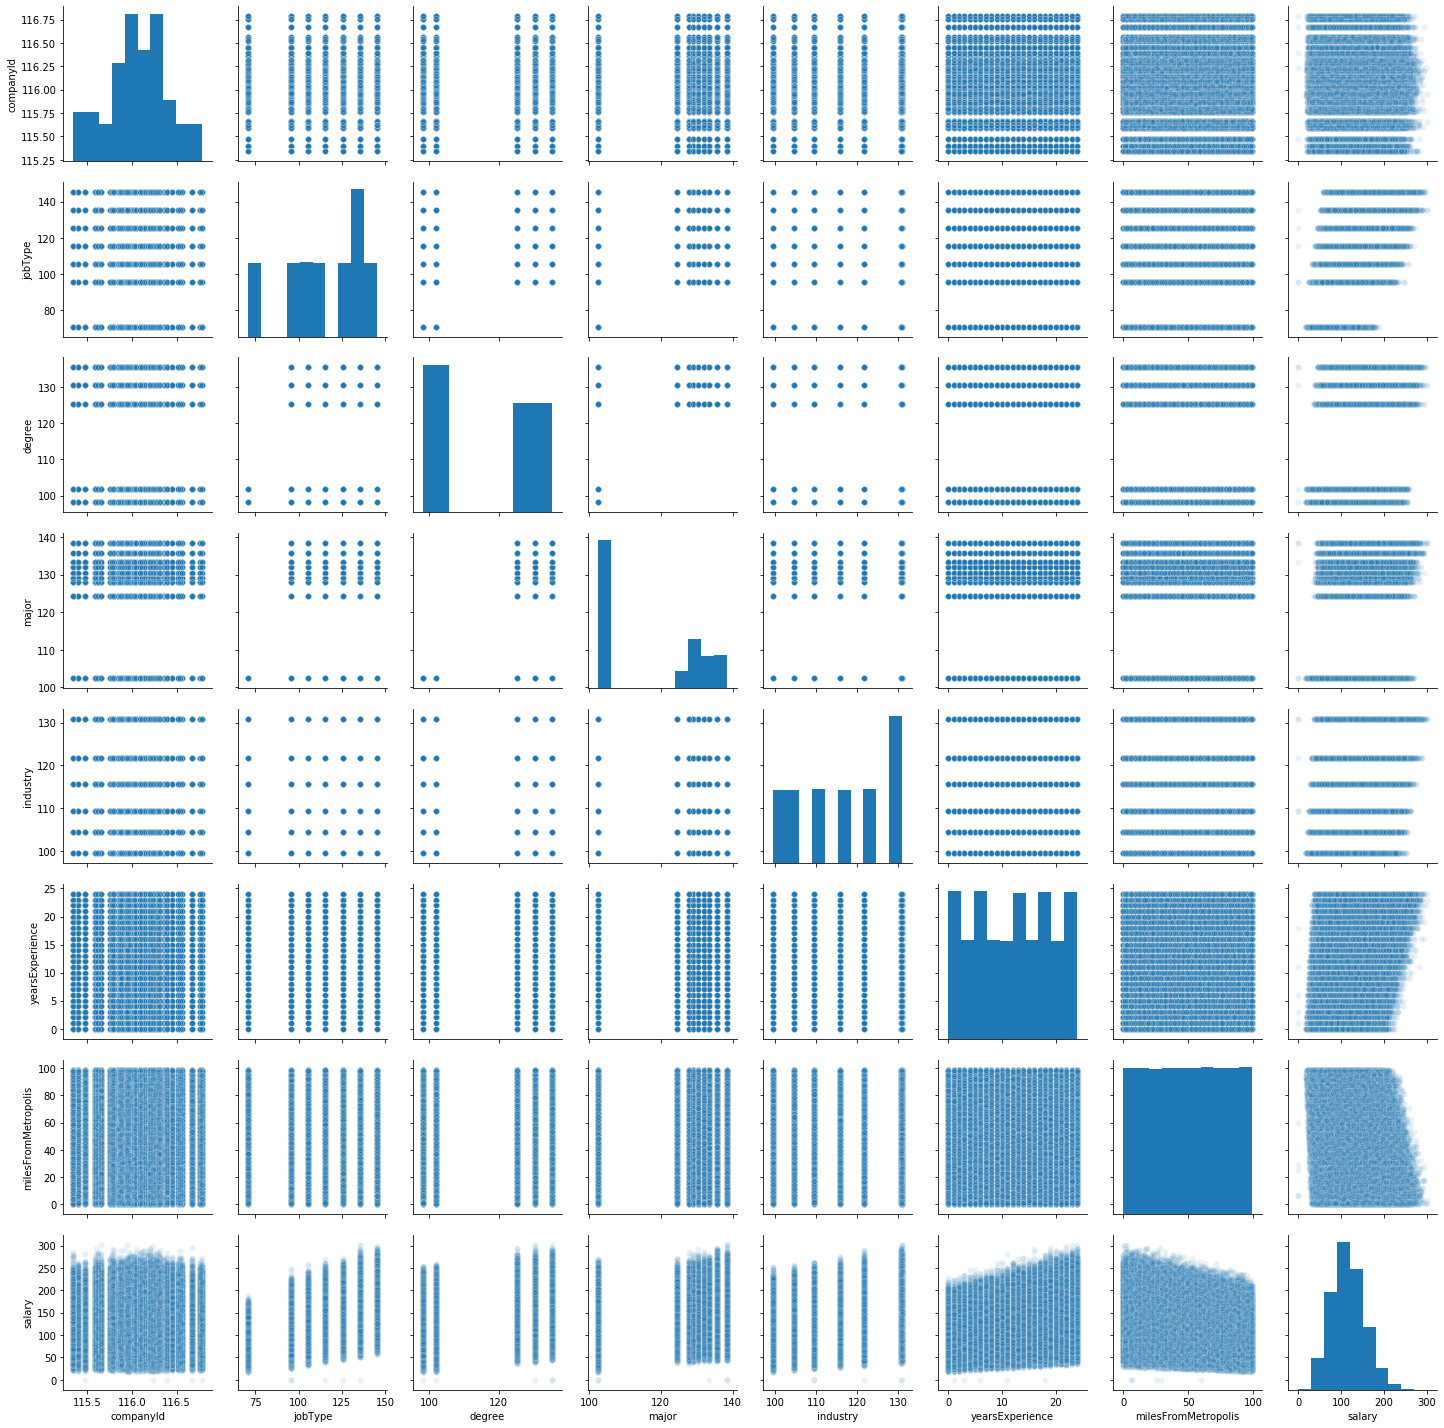

In [8]:
corr_map_pair_plot(train_full, 'salary', ['jobId'])

Some observations from the visualizations:

I did not visualize jobId as it had 1000000 unique values. However, since it is a unique identifier, it should be dropped as it will have no predictive power in our models. CompanyId as a whole seems to have very little predictive power, with only tiny variations between companies.

The other 4 categorical variables and 2 numeric variables show some clear predictive power, varying with the target variable of salary. The maximum value of experience appears to be 25, and the maximum distance from metropolis appears to be 100. Again, there are some slightly strange values for salary that I should examine.

### --- Clean ---

In [9]:
low, high = find_outlier_bounds(train_full, 'salary')

I will use the Tukey rule of 1.5 * the IQR to find outliers in the target salary variable.

In [10]:
train_full.loc[train_full['salary'] <= low].head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


Considering there are roles such as CTO and vice president listed here, it seems safe to say that these salaries are simply missing and not true salaries. As such, these should be removed.

In [11]:
train_full.loc[train_full['salary'] >= high].head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
966,JOB1362684408653,COMP32,CEO,DOCTORAL,ENGINEERING,FINANCE,23,11,247
986,JOB1362684408673,COMP37,CFO,HIGH_SCHOOL,NONE,FINANCE,24,20,229
1211,JOB1362684408898,COMP24,CTO,DOCTORAL,BUSINESS,FINANCE,5,46,232
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
1413,JOB1362684409100,COMP56,VICE_PRESIDENT,MASTERS,MATH,WEB,24,15,241


There are many CEOs and CFOs on this listed, and most jobs listed have over 20 years of experience. As such, these are likely real salaries and should not be removed.

In [12]:
drop_col_names = ['jobId', 'companyId']

##I use my clean helperfunctions to drop certain columns and remove outliers.
train_full_drop = drop_cols(train_full, drop_col_names)
train_full_clean = remove_outliers(train_full_drop, 'salary', low=0)

In [13]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']
cat_cols = ['jobType', 'degree', 'major', 'industry']

##More helper functions to make sure columns are proper data type and there are no NAs.
train_full_clean = set_numeric(train_full_clean, numeric_cols)
train_full_clean = set_categorical(train_full_clean, cat_cols)
train_full_clean = impute_mean(train_full_clean, numeric_cols)
train_full_clean = impute_mode(train_full_clean, cat_cols)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### ---- Establish a baseline ----

I will be using RMSE as our evaluation metric as it is easily interpretable as the standard deviation of our error, and is a reasonable metric for evaluating the accuracy of predictions on a quantitative response variable.

<Figure size 1080x576 with 0 Axes>

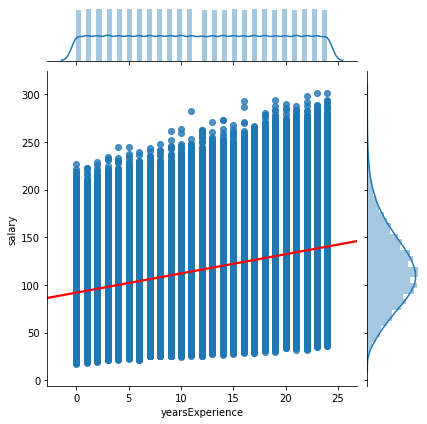

35.89154321454697


In [14]:
from sklearn.linear_model import LinearRegression


def RMSE(actual, predictions):
    '''calculate root mean squared error between the actual and predicted values'''
    return np.sqrt(((actual - predictions) ** 2).mean())
    
lm = LinearRegression()
lm.fit(np.array(train_full_clean['yearsExperience']).reshape(-1, 1), train_full_clean['salary'])
predictions = lm.predict(np.array(train_full_clean['yearsExperience']).reshape(-1, 1))
baseline_RMSE = RMSE(train_full_clean['salary'], predictions)
plt.figure(figsize = (15, 8))
sns.jointplot(x = 'yearsExperience', y = 'salary', data = train_full_clean, kind = 'reg', joint_kws={'line_kws':{'color':'red'}})
plt.show()
print(baseline_RMSE)

I get a baseline RMSE of 35.89 by creating a simple linear model using only 1 feature and no validation. I hope to improve on said baseline, potentiall up to 50% if possible.

### ---- Hypothesize models ----

The first potential model is a Linear Regression using all features and potentially using some feature scaling. I saw in EDA some linear relationships between features and the target, so this is potentially a good fit.

Other possible models would be:

1. Random forest which typically has high performance but lessens the effect of overfitting from a single decision tree. It also tends to be slightly less interpretable than simple models such as Linear Regression.

2. Gradient boosting, which usually results in improved results compared to random forest but with slower training time and prediction time.

3. KNN, to take a different approach and see if the spatial relationship of the instances can be exploited.

### ---- Engineer features  ----

In [15]:
def split_features_target(df, target):
    '''takes a dataframe with the target and the features, returns a features dataframe and the target as a seperate series'''
    target_series = df.pop(target)
    return df, target_series

features_train, target_train = split_features_target(train_full, 'salary')

In [16]:
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet


def one_hot_encode(df, cat_cols):
    '''takes a dataframe and list of categorical columns, removes those columns and adds one hot encoded versions 
    of the columns to the dataframe'''
    df = pd.concat([df, pd.get_dummies(df[cat_cols])], axis=1)
    df.drop(cat_cols, axis=1, inplace=True)
    return df

features_train = one_hot_encode(features_train, cat_cols)


class Normalizer(BaseEstimator, TransformerMixin):
    '''normalizes data over a column'''
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.apply(lambda x: (x - min(x))/(max(x) - min(x)))

knn_pipe = Pipeline([('normalize', Normalizer()),
                     ('knn', KNeighborsRegressor())])

lm_pca_pipe = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA()),
                        ('en', ElasticNet())])

I attempted to create a pipeline for a linear regression with Polynomial features, however this was consistently crashing my computer due to the high memory allocation necessary for the large increase in features. As such, polynomial features seem to be infeasible on this dataset.

I split the target into its own series and one hot encoded all of my categorical variables in order to use them in models. I also created a normalizer class in order to normalize the features for my KNN algorithm which requires features to have similar scales in order to function well.

### ---- Create models ----

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

lm_full = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

RMSE_scorer = make_scorer(RMSE, greater_is_better=False)

model_list = [lm_full, lm_pca_pipe, rf, gb, knn_pipe

lm_param = [{'alpha': [0.1, 1, 10], 'l1_ratio':[0.25, 0.5, 0.75]}]
pca_param = [{'en__alpha': [0.1, 1, 10], 'en__l1_ratio': [0.25, 0.5, 0.75]}]
rf_param = [{'n_estimators':[100], 'max_depth':[3, 5, 7, 10], 'max_features':[0.25, 0.5, 0.75, 'auto']}]
gb_param = [{'n_estimators':[100], 'max_depth':[2, 3, 4, 5], 'max_features':[0.25, 0.5, 0.75]}]
knn_param = [{'knn__n_neighbors':[5, 9, 15, 25], 'knn__weights':['uniform', 'distance']}]

param_grids = [lm_param, pca_param, rf_param, gb_param, knn_param]

I initialize the other 3 models and also create parameter grids of reasonable values for the hyperparameters of each value. This will allow me to optimize over the hyperparameters and find models that score well on the validation data.

### ---- Train models ----

In [18]:
def train_model(model, param_grid, features, targets, rmse_dict, param_dict, cv=2, scorer=RMSE_scorer):
    '''takes a model, parameter grid, dataframe of features, series of targets, and two dictionaries. optimizes the model
    across the given parameters and returns the best RMSE and best parameters to the two dictionaries provided. Can
    optionally provide the number of cross-validations or the scorer, default scorer is RMSE'''
    gscv = GridSearchCV(model, param_grid, cv=cv, scoring=scorer)
    gscv.fit(features, targets)
    rmse_dict[model] = gscv.best_score_
    param_dict[model] = gscv.best_params_

RMSE_dict = {}
param_dict = {}

In [19]:
##This cell will take a LONG time to run.

run_gridsearch = True

if run_gridsearch:
    for i, model in enumerate(model_list):
        train_model(model, param_grids[i], features_train, target_train, RMSE_dict, param_dict)

In [20]:
for key, val in RMSE_dict.items():
    RMSE_dict[key] = -1.0 * val
    print (key, val)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) -20.145856898544192
Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('en',
                 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False) -19.633961964811505
RandomForestRegressor(bo

### ---- Select best model  ----

In [21]:
final_model = min(RMSE_dict, key=RMSE_dict.get)

final_model.fit(features_train, target_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Gradient boosting unsurprisingly has the lowest RMSE. However, KNN also scores well and could potentially be implemented if a low training time is desirable. I will implement the gradient boosting as it was the most effective. I retrain the model on the full data to give ourself the most powerful possible model for the test data.

In [22]:
##Transforming the test data with the same transformations as the training data
test_features = drop_cols(test_features, drop_col_names)
test_features = set_numeric(test_features, numeric_cols)
test_features = set_categorical(test_features, cat_cols)
test_features = impute_mean(test_features, numeric_cols)
test_features = impute_mode(test_features, cat_cols)
test_features = one_hot_encode(test_features, cat_cols)

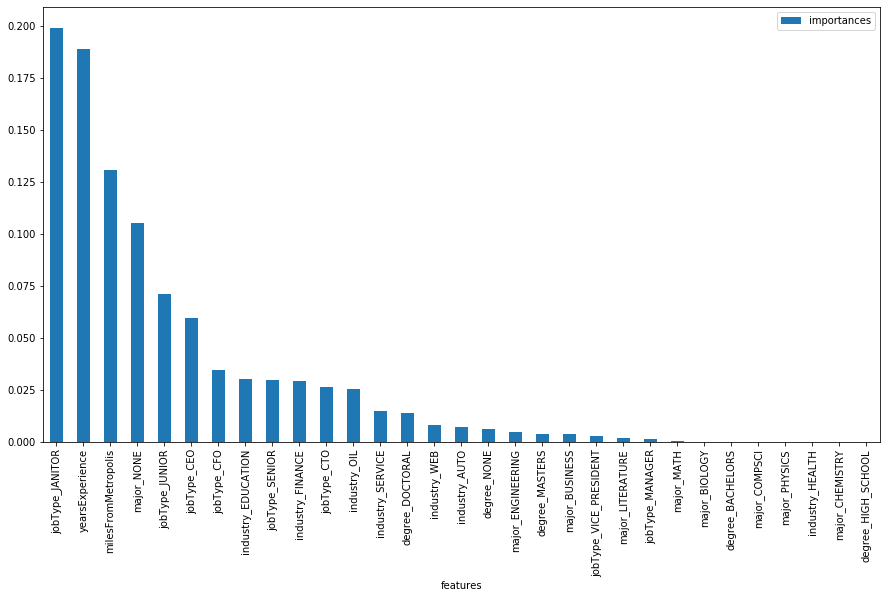

In [23]:
#Generate predictions and feature importances
predictions = final_model.predict(test_features)

predictions = pd.Series(np.array(predictions))

if hasattr(final_model, 'feature_importances_'):
    feature_importances = final_model.feature_importances_
else:
    feature_importances = [0] * len(features_train.columns)

feature_importances = pd.DataFrame({'features': features_train.columns, 'importances': feature_importances})
feature_importances.set_index('features', inplace=True)
feature_importances.sort_values('importances', ascending=False, inplace=True)
plot = feature_importances.plot.bar(figsize=(15, 8))
plt.show()

Surprisingly, according to the model, the most important feature is knowing whether or not the job posting is for a janitor! Beyond that we have miles from metropolis and years experience.

In [24]:
#Save all results to SQL DB. Save model to .txt and figures to .png files
from sqlalchemy import create_engine
from logincreds import db_user, db_password, db_server, db_name

engine_string = "postgresql://%s:%s@%s:5432/%s" %(db_user, db_password, db_server, db_name)
engine = create_engine(engine_string)

predictions.to_sql('predictions', engine, if_exists='replace', method='multi')
feature_importances.to_sql('feature_importances', engine, if_exists='replace', method='multi')

with open('final_model.txt', 'w') as f:
    f.write(str(final_model))
    
fig = plot.get_figure()
fig.savefig('feature_importances1.png')

In [25]:
!cat final_model.txt

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
